In [64]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
import string
import math

In [65]:
Fs = 16000 # sampling freqency
TWOPI = 2 * np.pi
T=1

In [66]:
my_alphabet = list(' ' + string.ascii_lowercase + string.ascii_uppercase + string.digits) #our alphabet

#transforms a character from our alphabet to its binary representation
def toBinary(c):
    my_index = my_alphabet.index(c)
    toBinary = bin(my_index)
    return toBinary[2:] # we remove the header "0b"

In [67]:
number_bits = np.log2(len(my_alphabet)) # the number of bits we require to represent our alphabet
my_base = np.linspace(1000, 2000, num= math.ceil(number_bits)) # shouldn't they be mutually prime?

In [68]:
#adds to x a wave of frequency f
def wave(x,f,n):
    x += np.sin(TWOPI * (float(f)/Fs) * n)
    return x

#transforms a character from our alphabet to a distinct wave
def toWave(c):
    my_bin = toBinary(c)
    x = np.zeros((T * Fs))
    n = np.arange(len(x))
    for i in range(len(my_bin) -1, -1, -1):
        if(int(my_bin[i])):
            f = my_base[len(my_bin) -1 - i] # because of the binary base
            x = wave(x, f, n)
    return x

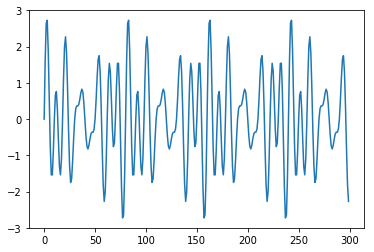

In [69]:
#You can test every character here (example with 'D')

x = toWave('y')
# the plot
plt.plot(x[0:300])
plt.show()

# we can play it:
IPython.display.Audio(x, rate=Fs)

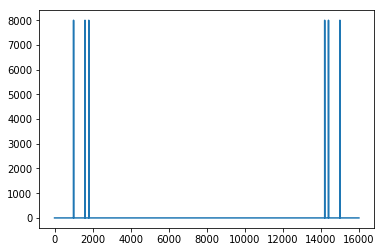

In [70]:
X = np.fft.fft(x)
plt.plot(np.abs(X))
plt.show()